# INTELIGÊNCIA ARTIFICIAL
## **REDES NEURAIS ARTIFICIAIS: CLASSIFICAÇÃO**
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import statistics  as sts
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **LEGENDA**

Age = idade (anos)

Sex = sexo (0=M; 1=F)

Chest Pain Type = tipo de dor no peito (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)

Resting BP = pressão sanguínea em repouso (mmHg)

Cholesterol = colesterol sérico (mg/dl)

Fasting BS = açúcar no sangue em jejum (mg/dl)
          0: Fasting BS < 120 mg/dl (não diabético)
          1: Fasting BS >= 120 mg/dl, (diabético)

Resting ECG = eletrocardiograma em repouso (0=Normal; 1=ST:Anormalidade da onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)

Max HR = frequência cardíaca máxima

Exercise Angina = Angina induzida por exercício (0=Não; 1=Sim)

Old Peak = Depressão de ST induzida por exercício em relação ao repouso

ST_Slope = Inclinação do segmento ST (0=UP; 1=Flat; 2=Down)

Heart Disease = Doença cardíaca (0=Não possui doença cardíaca; 1=Possui doença cardíaca)



In [ ]:
df.shape

(918, 12)

## **Transformando as classes strings em variáveis categóricas ordinais**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [ ]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
df.shape

(918, 12)

## **ATRIBUTOS PREVISORES E ALVO**

In [ ]:
# previsores = df2.iloc[:, 0:11].values
previsores = df.drop(['HeartDisease'], axis=1)

In [ ]:
previsores

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [ ]:
previsores.shape

(918, 11)

In [ ]:
alvo = df['HeartDisease']

In [ ]:
alvo

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
alvo.shape

(918,)

## **Análise das escalas dos atributos (Escalonamento)**

In [ ]:
previsores = StandardScaler().fit_transform(previsores)

In [ ]:
previsores

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

## **BASE DE TREINO E TESTE**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.3, random_state = 0)

# **CRIAÇÃO DO ALGORITMO**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPClassifier?

Parâmetros MLPClassifier   
- hidden_layer_sizes (camadas escondidas): default (100,)   

  Quant.= (Ne+Ns)/2 = (11+1)/2 = 6 neurônios   
  Quant.=2/3.(Ne) + Ns = 2/3.11+1 = 8 neurônios
- activation: Função de ativação default='relu' 
- solver: algoritmo matemático. Default='adam' (datasets grandes = acima de 1000 amostras). lbfgs é para datasets pequenos. sgd é com a descida do gradiente estocástico (recomendado testar).
- alpha:  parâmetro para o termo de regularização de ajuste de pesos. Aumento de alpha estimula pesos menores e diminuição de alpha estimula pesos maiores. Default=0.0001.
- batch_size: tamanho dos mini lotes. default=min(200, n_samples). Não usar com o solver lbfgs.
- learning_rate: taxa de aprendizagem. default='constant'. Três tipos:   
  1- 'constant':uma taxa de aprendizado constante dada pela taxa de aprendizagem inicial.   
  2- 'invscaling': diminui gradualmente por: taxa efetiva = taxa inicial / t^power_t  
  3- 'adaptive': a taxa é dividida por 5 cada vez que em duas épocas consecutivas não diminuir o erro.
- learning_rate_init: taxa de aprendizagem inicial. Default=0.001
- max_iter int: Número máximo de iterações. default = 200.  ('sgd', 'adam').
- max_fun: Número máximo de chamadas de função de perda. Para 'lbfgs'. Default: 15000
- shuffle: default = True
Usado apenas quando solver = 'sgd' ou 'adam'.
- random_state: default = None
- tol:Tolerância para a otimização.Default=0.0001
- momentum: otimização do algoritmo 'sgd'. Default: 0.9.
- n_iter_no_change: Número máximo de épocas que não atinge a tolerância de melhoria. default = 10. Apenas para solver = 'sgd' ou 'adam'
- verbose : Mostra o progresso. default=False.



In [ ]:
rna = MLPClassifier(hidden_layer_sizes=(10,10, 10), activation='relu', solver='sgd', max_iter =800,
                              tol=0.0001, random_state = 3, verbose = True)
                               

In [ ]:
rna.fit(x_treino, y_treino)

Iteration 1, loss = 0.77758423
Iteration 2, loss = 0.77470837
Iteration 3, loss = 0.77039779
Iteration 4, loss = 0.76510036
Iteration 5, loss = 0.75921822
Iteration 6, loss = 0.75286208
Iteration 7, loss = 0.74606220
Iteration 8, loss = 0.73962744
Iteration 9, loss = 0.73318948
Iteration 10, loss = 0.72726333
Iteration 11, loss = 0.72153509
Iteration 12, loss = 0.71640421
Iteration 13, loss = 0.71112145
Iteration 14, loss = 0.70647152
Iteration 15, loss = 0.70181447
Iteration 16, loss = 0.69723910
Iteration 17, loss = 0.69327658
Iteration 18, loss = 0.68918674
Iteration 19, loss = 0.68544900
Iteration 20, loss = 0.68195107
Iteration 21, loss = 0.67856497
Iteration 22, loss = 0.67532204
Iteration 23, loss = 0.67229043
Iteration 24, loss = 0.66916472
Iteration 25, loss = 0.66610254
Iteration 26, loss = 0.66313493
Iteration 27, loss = 0.66039348
Iteration 28, loss = 0.65765834
Iteration 29, loss = 0.65496310
Iteration 30, loss = 0.65237188
Iteration 31, loss = 0.64966404
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=800, random_state=3,
              solver='sgd', verbose=True)

In [ ]:
previsoes = rna.predict(x_teste)

In [ ]:
previsoes

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes) * 100.0))

Acurácia: 82.25%


In [ ]:
confusion_matrix(y_teste, previsoes)

array([[ 87,  26],
       [ 23, 140]])

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       113
           1       0.84      0.86      0.85       163

    accuracy                           0.82       276
   macro avg       0.82      0.81      0.82       276
weighted avg       0.82      0.82      0.82       276



**Análise dados de treino**

In [ ]:
previsoes_treino = rna.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.8862928348909658

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[255,  42],
       [ 31, 314]])

### **Validação Cruzada**

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

rna = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter =800,
                              tol=0.0001, random_state = 3)
                               

for train_index, test_index in skf.split(x_treino, y_treino):
    x_train_fold, x_test_fold = previsores[train_index], previsores[test_index]
    y_train_fold, y_test_fold = alvo[train_index], alvo[test_index]
    rna.fit(x_train_fold, y_train_fold)    
    lst_accu_stratified.append(rna.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Lista de ACC: [0.8769230769230769, 0.9076923076923077, 0.84375, 0.90625, 0.84375, 0.890625, 0.875, 0.828125, 0.921875, 0.921875]

Maior ACC: 92.1875 %

Menor ACC: 82.8125 %

Média ACC: 88.15865384615384 %

Desvio Padrão: 0.03400046620276345


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred = rna.predict(x_teste)

In [ ]:
x_teste.shape

(276, 11)

In [ ]:
accuracy_score(y_teste,y_pred)

0.9021739130434783

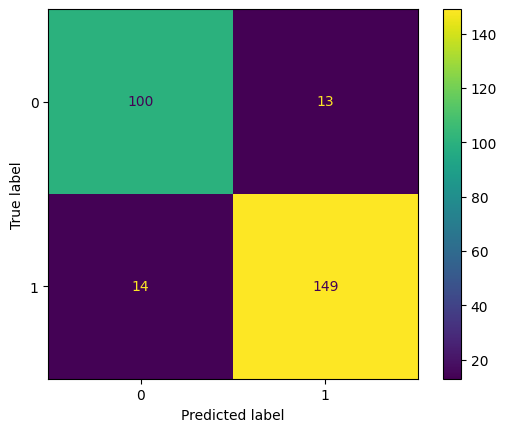

In [ ]:
cm = confusion_matrix(y_teste, y_pred)
ConfusionMatrixDisplay(cm).plot()

#### Algoritmo Árvore de Decisão

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_treino, y_treino)
y_pred = clf.predict(x_teste)     

In [ ]:
accuracy_score(y_teste,y_pred)

0.8478260869565217

#### Validação cruzada

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x_treino, y_treino):
    x_train_fold, x_test_fold = previsores[train_index], previsores[test_index]
    y_train_fold, y_test_fold = alvo[train_index], alvo[test_index]
    clf.fit(x_train_fold, y_train_fold)    
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.8923076923076924, 0.8, 0.859375, 0.890625, 0.859375, 0.84375, 0.859375, 0.859375, 0.828125, 0.921875]

Maior ACC: 92.1875 %

Menor ACC: 80.0 %

Média ACC: 86.14182692307692 %

Desvio Padrão: 0.034434670805162264


In [ ]:
y_pred = clf.predict(x_teste)

In [ ]:
x_teste.shape

(276, 11)

In [ ]:
accuracy_score(y_teste,y_pred)

0.8913043478260869

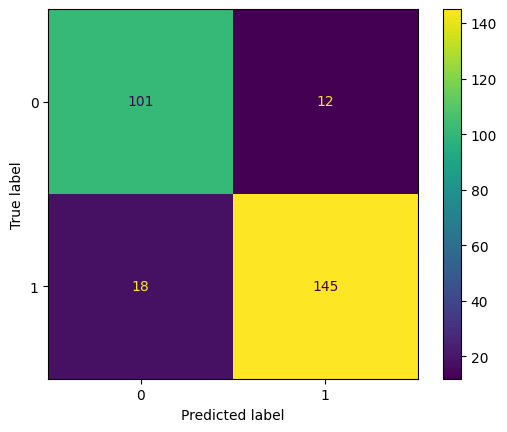

In [ ]:
cm = confusion_matrix(y_teste, y_pred)
ConfusionMatrixDisplay(cm).plot()

#### Exemplo com a biblioteca Tensorflow
* https://www.geeksforgeeks.org/implementing-neural-networks-using-tensorflow/
* https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
* https://keras.io/api/metrics/accuracy_metrics/

In [ ]:
import tensorflow as tf

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=[len(df.columns)-1])])

# after you create your model it's
# always a good habit to print out it's summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential([

	tf.keras.layers.Dense(units=100, activation='relu',
						input_shape=[len(df.columns)-1]),
	tf.keras.layers.Dense(units=1)
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',
			
			# MAE error is good for
			# numerical predictions
			loss='mae',
             metrics=[tf.keras.metrics.BinaryAccuracy()])


In [ ]:
losses = model.fit(x_treino, y_treino,

				validation_data=(x_teste, y_teste),
					
				# it will use 'batch_size' number
				# of examples per example
				batch_size=256,
				epochs=100, # total epoch

				)


Epoch 1/100
3/3 [==============================] - 1s 100ms/step - loss: 0.7532 - binary_accuracy: 0.4595 - val_loss: 0.7320 - val_binary_accuracy: 0.4167
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6643 - binary_accuracy: 0.4642 - val_loss: 0.6504 - val_binary_accuracy: 0.4167
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 0.5888 - binary_accuracy: 0.4751 - val_loss: 0.5747 - val_binary_accuracy: 0.4420
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5188 - binary_accuracy: 0.4953 - val_loss: 0.5050 - val_binary_accuracy: 0.5109
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.4539 - binary_accuracy: 0.5779 - val_loss: 0.4400 - val_binary_accuracy: 0.6232
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3957 - binary_accuracy: 0.6729 - val_loss: 0.3810 - val_binary_accuracy: 0.7283
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 0.3

In [ ]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(x_teste)


9/9 [==============================] - 0s 2ms/step


array([[ 1.0055516e+00],
       [ 1.0129879e+00],
       [ 1.0440155e+00],
       [ 8.6660486e-01],
       [ 8.5581236e-02],
       [ 2.1400277e-02],
       [-1.9215390e-02],
       [ 4.8401505e-02],
       [-2.5157332e-03],
       [-3.9564416e-02],
       [ 9.5077181e-01],
       [ 6.8348026e-01],
       [ 1.0323175e+00],
       [ 9.7361100e-01],
       [ 9.3878776e-02],
       [ 9.8108184e-01],
       [ 9.1853416e-01],
       [ 1.0780363e+00],
       [ 1.0975807e+00],
       [ 1.5182588e-02],
       [ 9.6335083e-01],
       [ 1.0703638e+00],
       [ 7.9641265e-01],
       [ 1.0115613e+00],
       [-7.7146187e-02],
       [ 3.5107896e-02],
       [ 9.5862067e-01],
       [ 1.1154552e+00],
       [ 1.0056933e+00],
       [ 4.0414804e-01],
       [ 1.0001751e+00],
       [ 2.1388523e-02],
       [ 1.4685945e-01],
       [ 1.8730426e-01],
       [ 6.5556788e-01],
       [ 8.1761412e-02],
       [ 1.0614727e+00],
       [ 2.8396212e-02],
       [ 5.7602787e-01],
       [ 8.0832444e-02],


<Axes: >

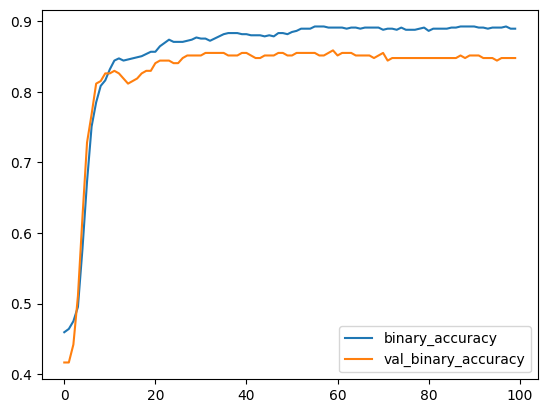

In [ ]:
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot()
